# Video Game Sales Analysis Project

## 1. Introduction

The video game industry has experienced tremendous growth over the years, driven by advancements in technology, expanding platforms, and increasing consumer engagement. As a global online store for video games, **Streamchik** operates in a competitive market. To remain ahead, the company aims to identify key patterns that determine the success of video games. These insights will help prioritize potentially popular products and efficiently plan marketing campaigns.

In this project, we will analyze historical data on video game sales, user and expert ratings, genres, and platforms (e.g., Xbox, PlayStation). By leveraging this dataset, we will explore trends and draw actionable conclusions to support a marketing strategy for 2017.

### Objective

The goal of the project is to:
- Discover patterns in video game sales and characteristics that contribute to their success.
- Utilize these patterns to make informed decisions about potential bestsellers.
- Plan effective advertising campaigns for 2017 based on the insights gained.

The analysis will simulate a scenario where it is December 2016, and we are preparing for the upcoming year. While the dataset includes data up to 2016, the approach can be generalized for future predictions as well.

### Dataset Description

The dataset contains historical data on video game sales and ratings, with the following columns:

- **Name**: The name of the game.
- **Platform**: The platform on which the game was released (e.g., Xbox, PlayStation).
- **Year_of_Release**: The release year of the game.
- **Genre**: The genre of the game (e.g., Action, Sports).
- **NA_sales**: Sales in North America (in millions of copies).
- **EU_sales**: Sales in Europe (in millions of copies).
- **JP_sales**: Sales in Japan (in millions of copies).
- **Other_sales**: Sales in other regions (in millions of copies).
- **Critic_Score**: Critics’ rating of the game (out of 100).
- **User_Score**: Users’ rating of the game (out of 10).
- **Rating**: The ESRB rating that categorizes games by appropriate age groups (e.g., “E for Everyone,” “T for Teen”).

Note: Data from 2016 may be incomplete.

### Steps to Complete the Project

1. **Data Preprocessing**:
    - Clean the data and handle missing values.
    - Transform column names and data types as required.
    - Investigate specific issues like the 'tbd' value in user scores.

2. **Exploratory Data Analysis (EDA)**:
    - Analyze game release trends and sales dynamics over time.
    - Identify key platforms and their sales trends.
    - Examine the relationship between game ratings and sales.
    - Assess the profitability of different game genres.
data['user_score'].value_counts()
3. **Regional Analysis**:
    - Create user profiles for different regions (North America, Europe, Japan).
    - Identify the most popular platforms and genres in each region.
    - Analyze the impact of ESRB ratings on regional sales.

4. **Hypothesis Testing**:
    - Test if the average user ratings for Xbox One and PC are the same.
    - Test if the average user ratings for Action and Sports games differ.

5. **Conclusion**:
    - Summarize the findings and provide actionable recommendations for the 2017 marketing strategy.

---

This analysis will help **Streamchik** optimize its product offerings and advertising campaigns to capture the most significant opportunities in the video game market.


In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates

In [2]:
if os.path.exists('games.csv'):
    data = pd.read_csv('games.csv')
    print("Data successfully loaded locally.")
else:
    data = pd.read_csv('https://raw.githubusercontent.com/bronetazik99/Practicum_projects/refs/heads/main/Project3/games.csv')
    print("Local data not available. Data loaded from the web.")

Data successfully loaded locally.


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


The dataset contains **16,715 rows** and **11 columns**, detailing video game sales and ratings. Key insights from the data:

- The `User_Score` column is `object` but contains numerical data, suggesting a need for conversion.
- `Year_of_Release` has to be changed from 'float' type.

Actionable next steps: handle missing values, convert data types where needed, and prepare for analysis.

## Data Preparation

### 2.1 Renaming columns

In [6]:
data = data.rename(columns={'Name':'name', 'Platform':'platform', 'Year_of_Release':'rel_year', 'Genre':'genre',
                            'NA_sales':'na_sales','EU_sales':'eu_sales', 'JP_sales':'jp_sales', 'Other_sales':'other_sales',
                            'Critic_Score':'critic_score', 'User_Score':'user_score', 'Rating':'rating'})

In [7]:
data.columns

Index(['name', 'platform', 'rel_year', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Changing data types

In [8]:
data['rel_year'] = pd.to_datetime(data['rel_year'], format='%Y')
data['name'] = data['name'].astype(str)
data['platform'] = data['platform'].astype(str)

In [9]:
data['user_score'].value_counts()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

In the `user_score` column, there are values labeled as **"tbd"**, which likely stand for **"to be determined"**, meaning the score has not yet been established. To properly transform this column, we will:

1. Replace all **"tbd"** values with **NaN**, treating them as missing data.
2. Convert the column's data type to **float**, making it suitable for numerical operations.

In [10]:
data['user_score'] = data['user_score'].replace('tbd', np.nan).astype(float)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          16715 non-null  object        
 1   platform      16715 non-null  object        
 2   rel_year      16446 non-null  datetime64[ns]
 3   genre         16713 non-null  object        
 4   na_sales      16715 non-null  float64       
 5   eu_sales      16715 non-null  float64       
 6   jp_sales      16715 non-null  float64       
 7   other_sales   16715 non-null  float64       
 8   critic_score  8137 non-null   float64       
 9   user_score    7590 non-null   float64       
 10  rating        9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


### 2.3 Handling duplicates

In [12]:
data.duplicated().sum()

0

It is worth searching for incomplete duplicates based on key columns, for example, using the combination of the following parameters: 
`['name', 'platform']`.

Make sure to convert the contents of categorical columns to lowercase for consistency.

In [13]:
# Lowercasing Categorical Columns
categorical_columns = ['name', 'platform']  
for col in categorical_columns:
    data[col] = data[col].str.lower()

# Searching for Incomplete Duplicates
duplicates = data.duplicated(subset=['name', 'platform'], keep=False)

# Displaying Incomplete Duplicates
data_duplicates = data[duplicates]
display(data_duplicates.sort_values(by=['name', 'platform']))

,name,platform,rel_year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012-01-01,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,madden nfl 13,ps3,2012-01-01,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
659,nan,gen,1993-01-01,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,nan,gen,1993-01-01,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5972,need for speed: most wanted,pc,2005-01-01,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,need for speed: most wanted,pc,2012-01-01,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1190,need for speed: most wanted,x360,2012-01-01,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005-01-01,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,sonic the hedgehog,ps3,2006-01-01,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,sonic the hedgehog,ps3,NaT,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [14]:
print(data.duplicated(subset=['name', 'platform']).sum())

5


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   name          16715 non-null  object        
 1   platform      16715 non-null  object        
 2   rel_year      16446 non-null  datetime64[ns]
 3   genre         16713 non-null  object        
 4   na_sales      16715 non-null  float64       
 5   eu_sales      16715 non-null  float64       
 6   jp_sales      16715 non-null  float64       
 7   other_sales   16715 non-null  float64       
 8   critic_score  8137 non-null   float64       
 9   user_score    7590 non-null   float64       
 10  rating        9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


### 2.4 Handling missing values

In [16]:
def pass_value_barh(df):
    try:
        # Calculate percentage of missing values
        missing_percent = df.isna().mean() * 100
        
        # Filter columns with missing values and sort them
        (
            missing_percent
            .to_frame()
            .rename(columns={0: 'space'})
            .query('space > 0')
            .sort_values(by='space', ascending=True)
            .plot(kind='barh', figsize=(19, 6), rot=0, legend=False, fontsize=16)
        )
        
        # Set plot title, labels, and scale
        plt.title('Missing Values, %' + "\n", fontsize=22)
        plt.xlabel('Percentage of Missing Values', fontsize=22)
        plt.ylabel('Columns with Missing Values', fontsize=18)
        plt.xlim(0, 100)
        plt.show()
    except:
        print('No missing values left :) or an error occurred in the first part of the function.')

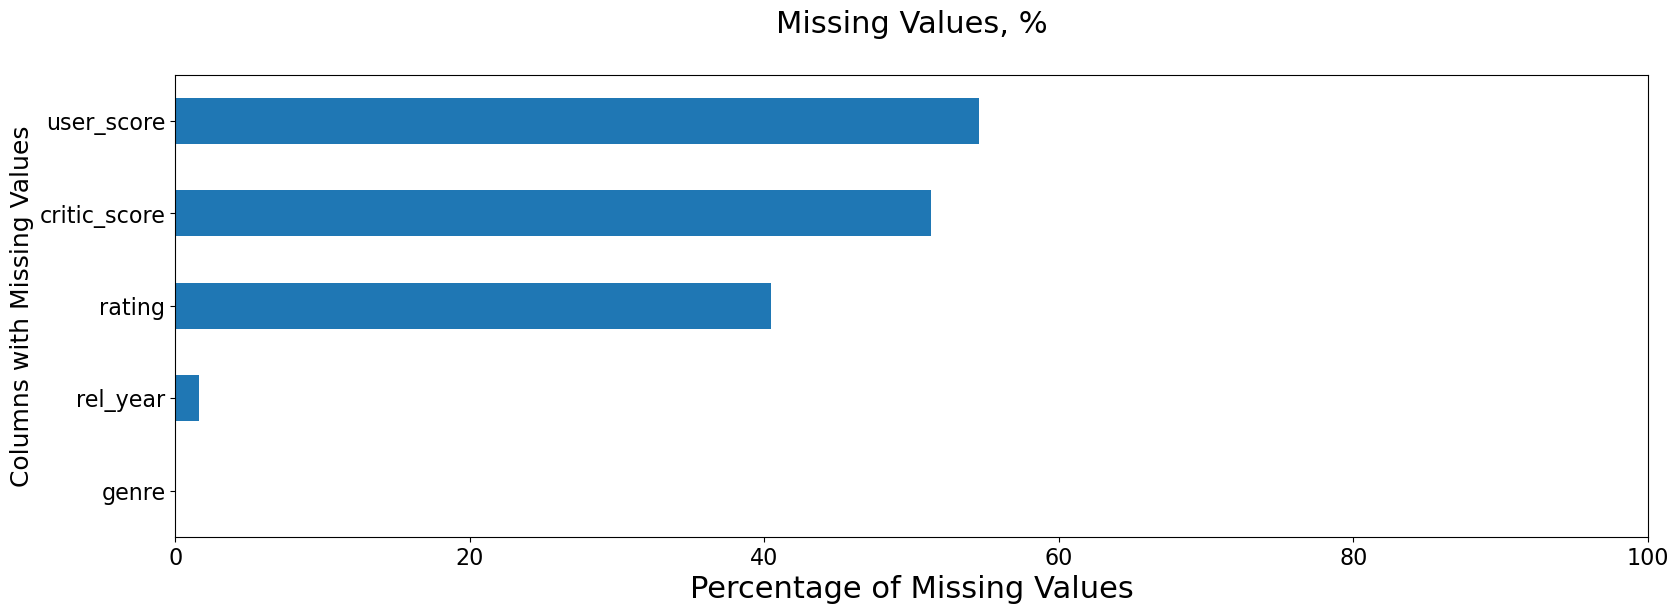

In [17]:
pass_value_barh(data)

- **Critic_Score** has the highest percentage of missing values, exceeding 55%.
- **User_Score** and **Rating** also have significant missing values, approximately 50%.
- A smaller proportion of missing values is observed in **Year_of_Release**.
- Columns such as **Genre** and **Name** have negligible or no missing values.

Let's check all the all columns.

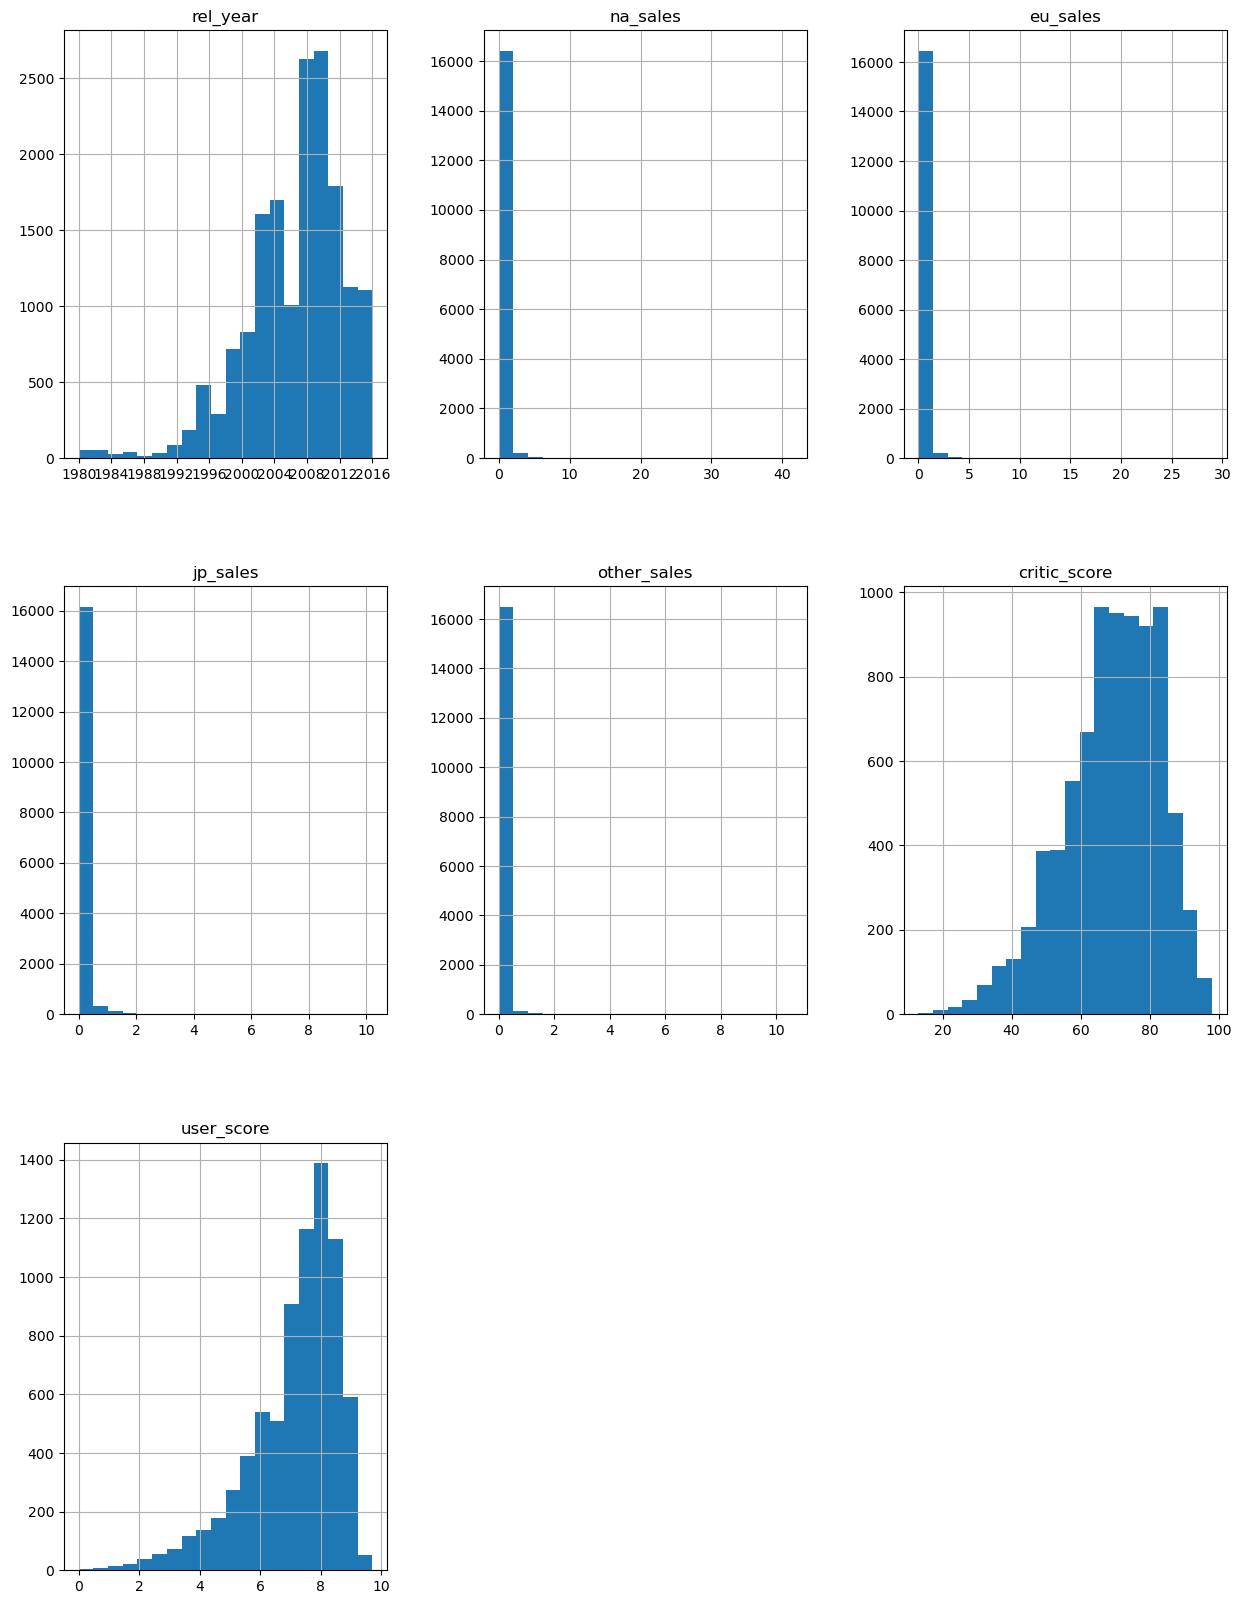

In [18]:
data.hist(figsize=(15, 20), bins=20, grid=True);

Histogram Summary

The histograms provide insights into the distribution of numeric variables in the dataset:

1. **Year of Release (`rel_year`)**:
   - The number of games released gradually increased over time, peaking in the early 2010s.
   - Few releases are observed before the 1980s.

2. **Sales Data (`na_sales`, `eu_sales`, `jp_sales`, `other_sales`)**:
   - Sales are highly skewed, with most games having very low sales and a few blockbuster titles dominating.
   - North America (`na_sales`) shows slightly higher maximum sales compared to other regions.
   - In all columns representing the number of copies sold (in millions), there are many zero values. The presence of zero values likely indicates that certain games were simply not sold in specific regions. We will take this fact into account during the analysis.

3. **Critic Score (`critic_score`)**:
   - Critic scores exhibit a roughly normal distribution, with most games scoring between 50 and 90.
   - Few games have very low or very high scores.

4. **User Score (`user_score`)**:
   - User scores are distributed between 0 and 10, with peaks around 6–8.
   - The distribution shows a slight left skew, indicating fewer low-scoring games.

Key Observations:
- Sales data highlights the dominance of a small number of highly successful games.
- There are significant differences in scoring behavior between critics and users, as critic scores have a normal-like distribution, while user scores are skewed.
- The peak in game releases during the early 2010s suggests a possible golden age for the industry.

Let's look at categorical variables.

Column `platform`:

In [19]:
data['platform'].value_counts()

platform
ps2     2161
ds      2151
ps3     1331
wii     1320
x360    1262
psp     1209
ps      1197
pc       974
xb       824
gba      822
gc       556
3ds      520
psv      430
ps4      392
n64      319
xone     247
snes     239
sat      173
wiiu     147
2600     133
nes       98
gb        98
dc        52
gen       29
ng        12
scd        6
ws         6
3do        3
tg16       2
gg         1
pcfx       1
Name: count, dtype: int64

Everything is okay, let's move on.

Column `genre`:

In [20]:
data['genre'].value_counts()

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

Everything is okay, let's move on.

Column `rating`:

In [21]:
data['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Note that some rating indicators are outdated and have been replaced by newer equivalents. Therefore, we will update the data in this Series by replacing the old indicators with the new ones.

The **AO** rating signifies an 18+ rating. Since there is only one row with this rating, we will simply remove it from the dataset.

In [22]:
data = data[data['rating'] != 'AO']

# Resetting Index After Row Deletion
data.reset_index(drop=True, inplace=True)

The **EC** rating was used for preschool-aged children; however, it was discontinued in 2018.
(https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board#Ratings)

The **K-A** rating is equivalent to the **E (Everyone)** rating prior to 1998. Therefore, we will replace it with **E**.

In [23]:
data['rating'] = data['rating'].replace({'EC': 'E', 'K-A': 'E'})

Since this Series contains many missing values, we will replace them with **RP** (Rating Pending) to indicate that the rating has not yet been assigned.

In [24]:
data['rating'] = data['rating'].fillna('RP')

Continue handling missing values:

In [25]:
data.isna().sum()

name               0
platform           0
rel_year         269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      9125
rating             0
dtype: int64

We will delete all rows where there are missing values in the `name` or `rel_year` columns, as these are critical for the analysis.

In [26]:
data = data.dropna(subset=['name','rel_year'])

The columns **`critic_score`** and **`user_score`** contain a significant number of missing values, with **8,578** and **9,125** missing entries respectively. We will **not handle** these missing values for the following reasons:

1. **Large Proportion of Missing Data**:
   - A substantial percentage of the data is missing, making it unreliable to impute values without introducing significant bias.
   - Imputation methods (e.g., mean, median, or regression-based) would not be meaningful due to the high proportion of missing values.

2. **Non-Critical for Core Analysis**:
   - These columns are not essential for analyzing sales trends, platform popularity, or game genre performance, which are the primary objectives of this study.
   - Excluding these missing values will not significantly affect the overall analysis.

3. **Inconsistent or Unavailable Sources**:
   - Missing scores likely indicate games that were not reviewed by critics or players, suggesting a lack of sufficient data in the original source.
   - Filling these values may misrepresent the actual reception of the games.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Checking the Number of Games Released by Year

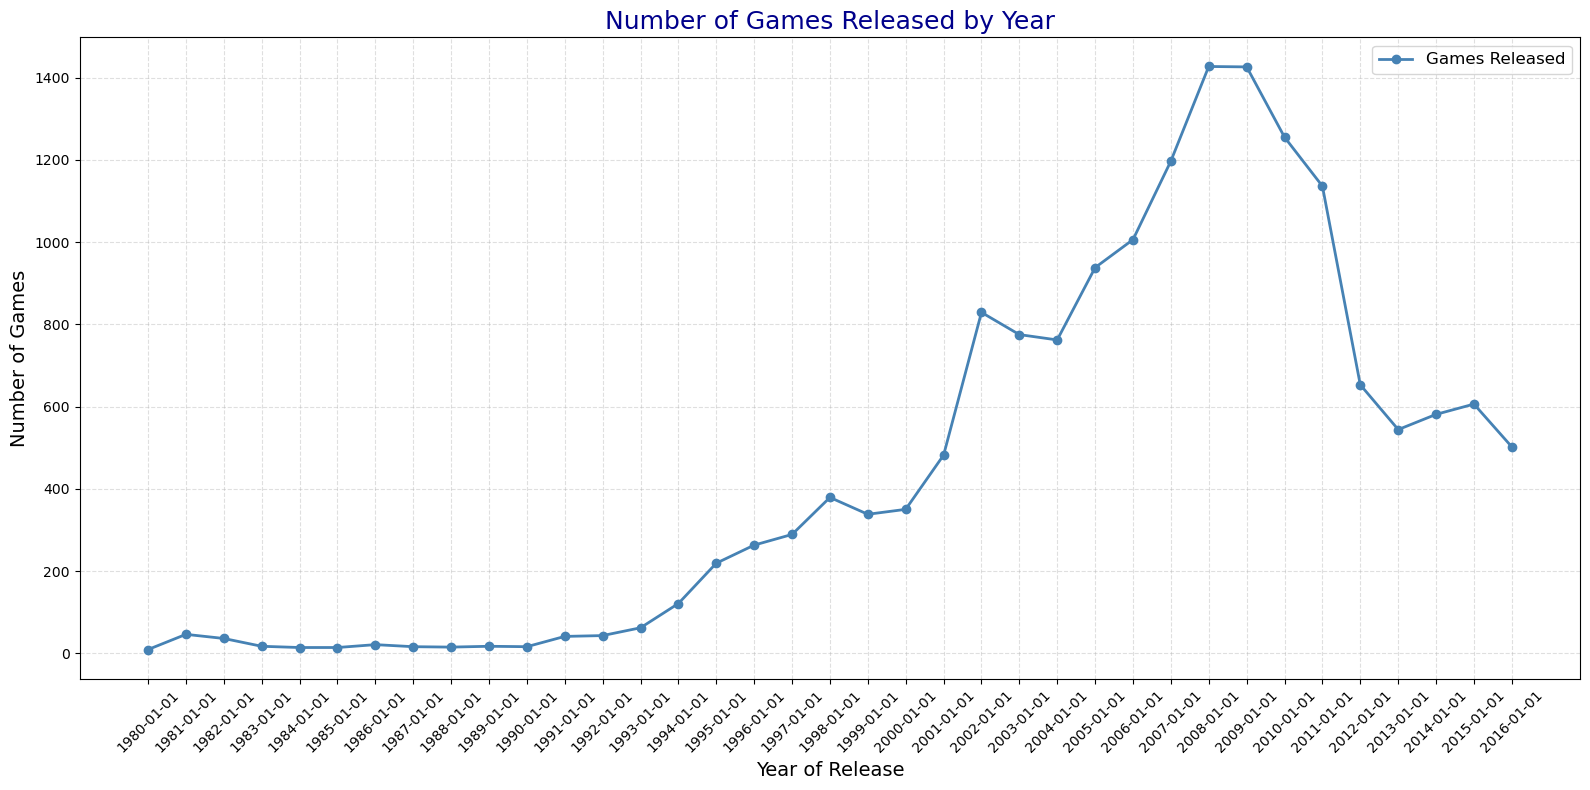

In [27]:
# Plot the number of games released per year
plt.figure(figsize=(16, 8))
games_per_year = data.pivot_table(index='rel_year', values='name', aggfunc='count')

# Improved plot with line style and markers
plt.plot(
    games_per_year,
    marker='o', 
    linestyle='-', 
    linewidth=2, 
    color='steelblue', 
    label='Games Released'
)

# Adding title and axis labels with improved formatting
plt.title('Number of Games Released by Year', fontsize=18, color='DarkBlue')
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Number of Games', fontsize=14)

# Adding grid for better readability
plt.grid(alpha=0.4, linestyle='--')

# Adding x-axis ticks for clarity
plt.xticks(ticks=games_per_year.index, fontsize=10, rotation=45)

# Adding a legend
plt.legend(fontsize=12)

# Displaying the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

The line graph shows the trend in the number of games released over time:

- The period between 2000 and 2009 saw the most significant growth in game releases.
- The decline in game releases after 2010 highlights a potential industry shift or consolidation.
- Further analysis could investigate whether the decline corresponds to changes in platform popularity, genre trends, or the emergence of digital distribution.


### 3.2 Analyzing Sales Trends by Platform

Let's add a Column for Total Sales Across All Regions

In [28]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

There is a strange outlier in the data for the DS platform in 1985. Considering that the DS was released much later, we should verify the platform's market release year and remove this anomaly from the dataset.

In [29]:
data = data[~((data['platform'] == 'ds') & (data['rel_year'] <= '1988'))]

In [30]:
# Group data by platform and year, summing sales
platform_sales = data.groupby(['platform', 'rel_year'])['total_sales'].sum().reset_index()

# Calculate total sales for each platform and sort in descending order
platform_totals = platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Select the top 5 platforms by total sales
top_platforms = platform_totals.head(5).index

# Filter data to include only the top platforms
top_platform_sales = platform_sales[platform_sales['platform'].isin(top_platforms)]

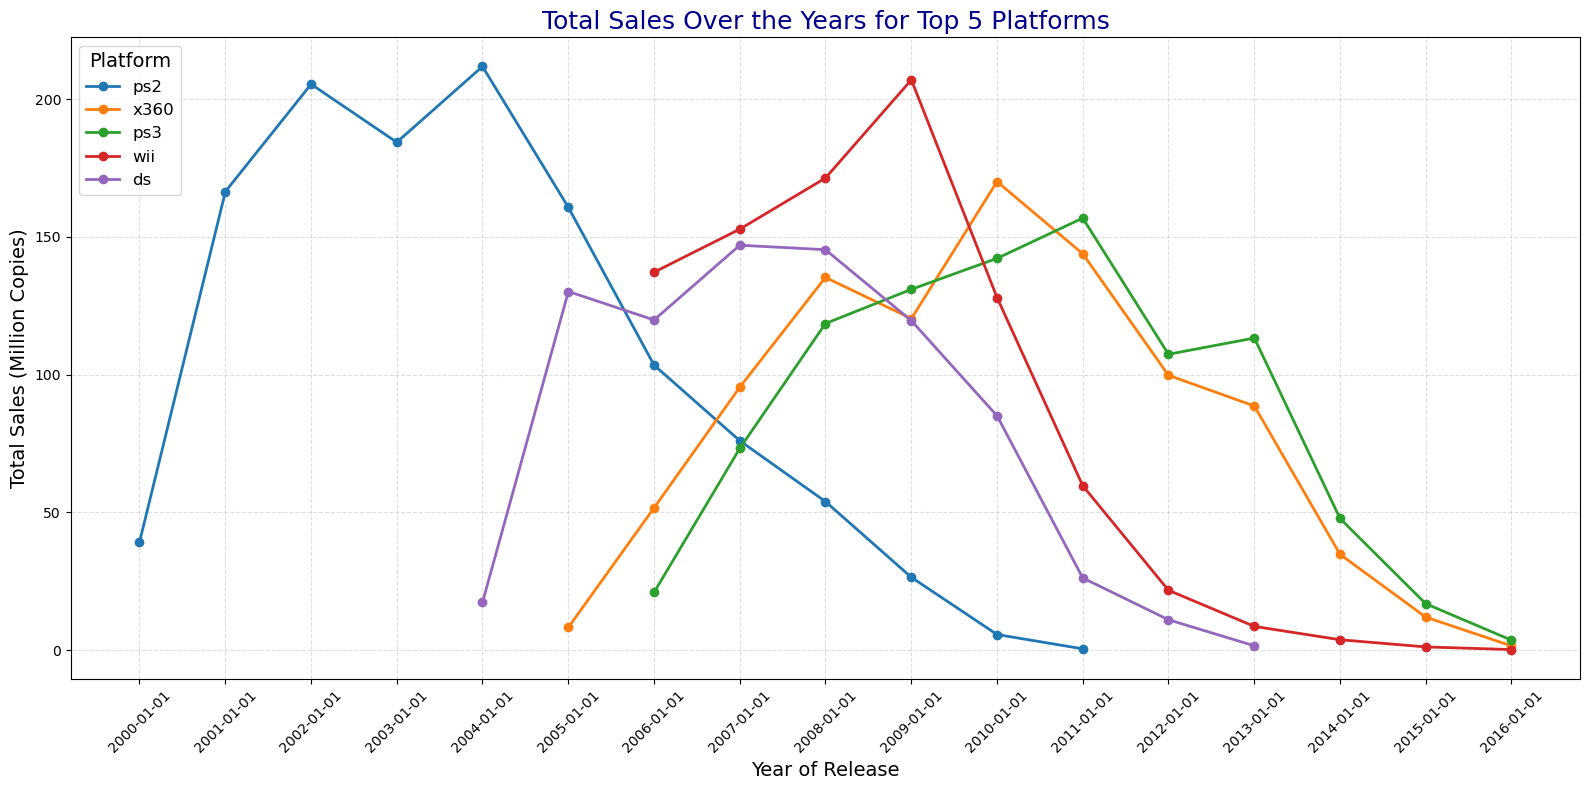

In [31]:
# Plotting total sales by year for top 5 platforms
plt.figure(figsize=(16, 8))

for platform in top_platforms:
    platform_data = top_platform_sales[top_platform_sales['platform'] == platform]
    plt.plot(
        platform_data['rel_year'],
        platform_data['total_sales'],
        marker='o',  # Add markers for better readability
        linestyle='-',  # Smooth lines
        linewidth=2,
        label=platform
    )

# Improved title and labels with formatting
plt.title('Total Sales Over the Years for Top 5 Platforms', fontsize=18, color='DarkBlue')
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales (Million Copies)', fontsize=14)

# Adding a legend with better placement
plt.legend(title='Platform', fontsize=12, title_fontsize=14, loc='upper left')

# Adding a grid for readability
plt.grid(alpha=0.4, linestyle='--')

# Setting x-ticks and formatting for better clarity
plt.xticks(ticks=sorted(top_platform_sales['rel_year'].unique()), rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

The graph illustrates the life cycles of various gaming platforms, highlighting trends in their rise, peak, and eventual decline in sales. Key observations from the chart:

1. **Peak Period**:
   - Most platforms reach their peak sales within 5–6 years of release.
   - For example, the PS2 (blue line) experienced rapid growth and sustained high sales levels for approximately 5–6 years after its launch.

2. **Life Cycle**:
   - After reaching their peak, platforms typically undergo a gradual decline in sales, with their market presence diminishing significantly over 10–12 years.
   - For instance, the PS2's sales diminished by 2010, roughly 10 years after its peak.

3. **Generation Overlap**:
   - New platforms are often introduced before the decline of their predecessors. For example, the PS3 began to rise as the PS2 started its decline.
   - This overlap demonstrates the industry's strategy to ensure a continuous market presence by transitioning users to newer platforms.

4. **Platform Longevity**:
   - Platforms tend to remain relevant for approximately a decade, with the first 5–6 years being the most profitable.

5. **Cycle Continuity**:
   - The introduction of new platforms roughly every 5–6 years creates overlapping generations, ensuring sustained revenue and a steady influx of consumers.

The gaming industry operates on a cycle where platforms enjoy a life span of around 10 years. The first half of their lifecycle sees significant growth and peak sales, while the latter half experiences a gradual decline. New platforms are typically launched during the decline phase of their predecessors, ensuring a seamless generational transition and market stability.


### 3.3 Selecting Data for the Relevant Current Period

Based on the analysis of the provided graph and previous observations, the relevant period for forecasting 2017 sales can be identified. The life cycle of gaming platforms suggests they remain relevant for approximately 7–10 years, with peak sales occurring in the first few years after release.

Therefore, analyzing data from the most recent 3–4 years (2013 to 2016) is the most appropriate approach. This period captures the current state of the market and highlights trends that are crucial for making accurate predictions for 2017.

In [32]:
data_actual = data.query('2013 <= rel_year <= 2016')

In [33]:
# Grouping data by platform and year, summing sales
platform_sales = data_actual.groupby(['platform', 'rel_year'])['total_sales'].sum().reset_index()

# Calculating total sales for each platform and sorting in descending order
platform_totals = platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Selecting the top 5 platforms by total sales
top_platforms = platform_totals.head().index

# Filtering data to include only the top platforms
top_platform_sales = platform_sales[platform_sales['platform'].isin(top_platforms)]

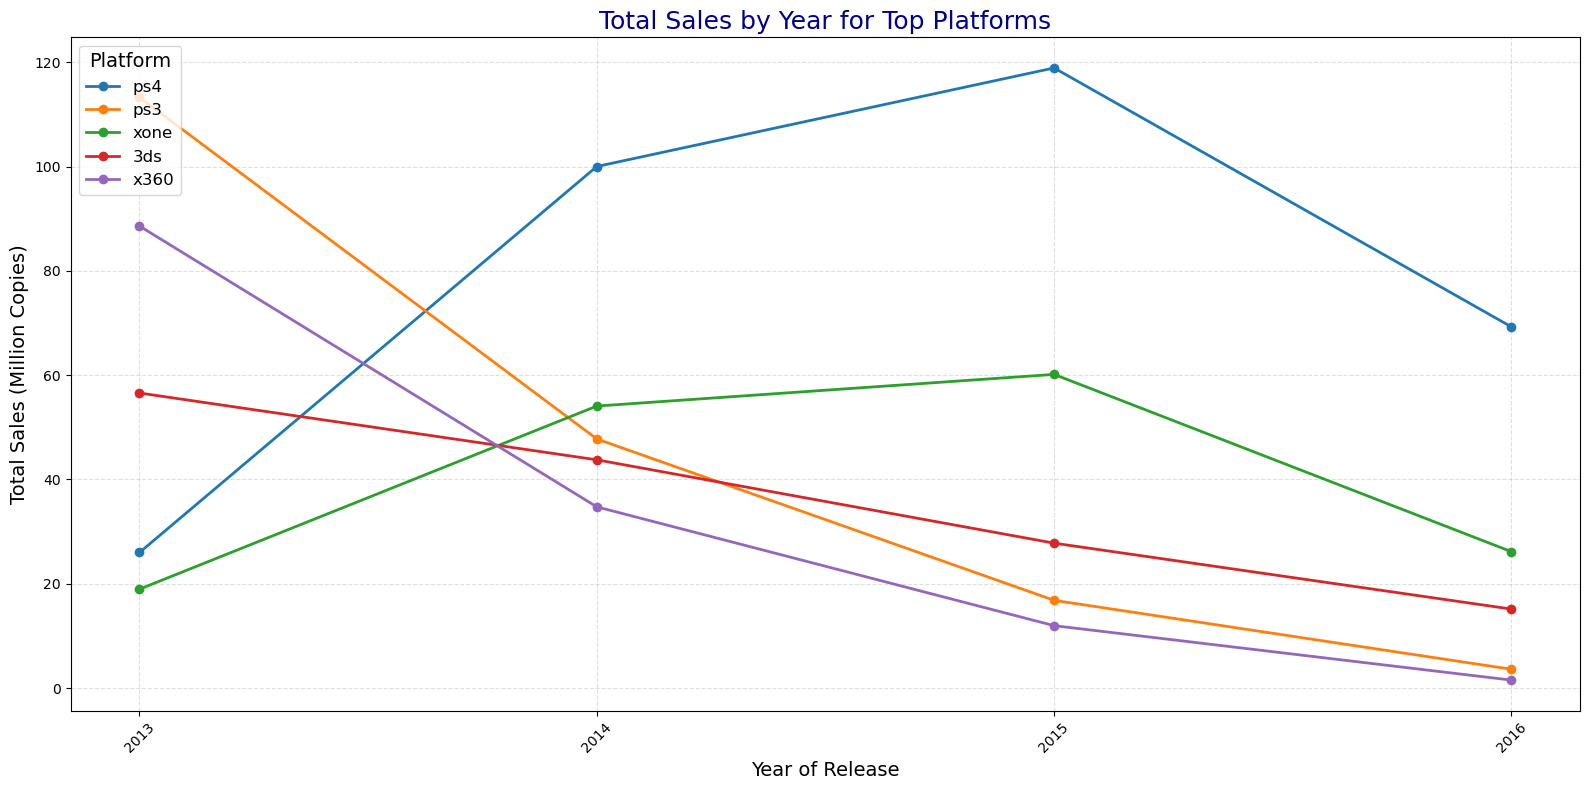

In [34]:
plt.figure(figsize=(16, 8))

for platform in top_platforms:
    platform_data = top_platform_sales[top_platform_sales['platform'] == platform]
    plt.plot(
        platform_data['rel_year'], 
        platform_data['total_sales'], 
        marker='o', 
        linestyle='-', 
        linewidth=2, 
        label=platform
    )

# Improved title and axis labels
plt.title('Total Sales by Year for Top Platforms', fontsize=18, color='DarkBlue')
plt.xlabel('Year of Release', fontsize=14)
plt.ylabel('Total Sales (Million Copies)', fontsize=14)

# Customizing x-axis with formatted years
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as year
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks every year
plt.xticks(rotation=45, fontsize=10)  # Rotate and format x-axis ticks
plt.yticks(fontsize=10)

# Adding a legend with better styling
plt.legend(title='Platform', fontsize=12, title_fontsize=14, loc='upper left')

# Adding a grid with improved readability
plt.grid(alpha=0.4, linestyle='--')

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

Based on the provided graph, the following insights can be derived:

1. **Market Leaders**:
   - The **PS4** shows consistent growth in sales since its launch and clearly dominates the market by the end of 2016.

2. **Declining Platforms**:
   - Sales on platforms such as **PS3**, **X360**, and to a lesser extent **3DS**, are in decline. This suggests that these platforms are in the later stages of their lifecycle.

3. **Platforms with Growth Potential**:
   - The **Xbox One** shows signs of growth, though not as significant as the PS4. However, its sales remain relatively strong, making it the second most popular platform after PS4.


- **PS4** and **Xbox One** are the most promising platforms for 2017:
  - Both are relatively new in the market, demonstrating strong demand and growth potential.
  - The PS4, in particular, is solidifying its position as the market leader, making it a key focus for game developers and publishers in 2017.

1. **3DS**:
   - Despite the decline in sales, the **3DS** remains an appealing platform for specific market segments, with sales hovering around 15–20 million copies. 
   - This is particularly attractive for fans of portable consoles or exclusive games that are unique to this platform.

2. **PC**:
   - Personal computers continue to be a critical and stable platform for gaming over the years.
   - Unlike consoles, PCs are not subject to the same short lifecycle, benefiting from the flexibility of hardware configurations and digital distribution platforms like **Steam**.
   - PC games often have lower prices compared to their console counterparts, making them an important market segment to consider for developers and publishers.


- **PS4** and **Xbox One**:
  - These platforms are the most promising for 2017 due to their strong growth and relatively recent market entry.
  - Their popularity makes them essential focuses for game development and marketing strategies.

- **3DS** and **PC**:
  - While PS4 and Xbox One dominate in terms of growth potential, the **3DS** and **PC** remain relevant for targeted strategies, especially for niche markets and fans of portability or platform-specific games.
  - Developers should not overlook these platforms when crafting a diversified market approach.

### 3.4 Building a Boxplot for Global Game Sales by Platform

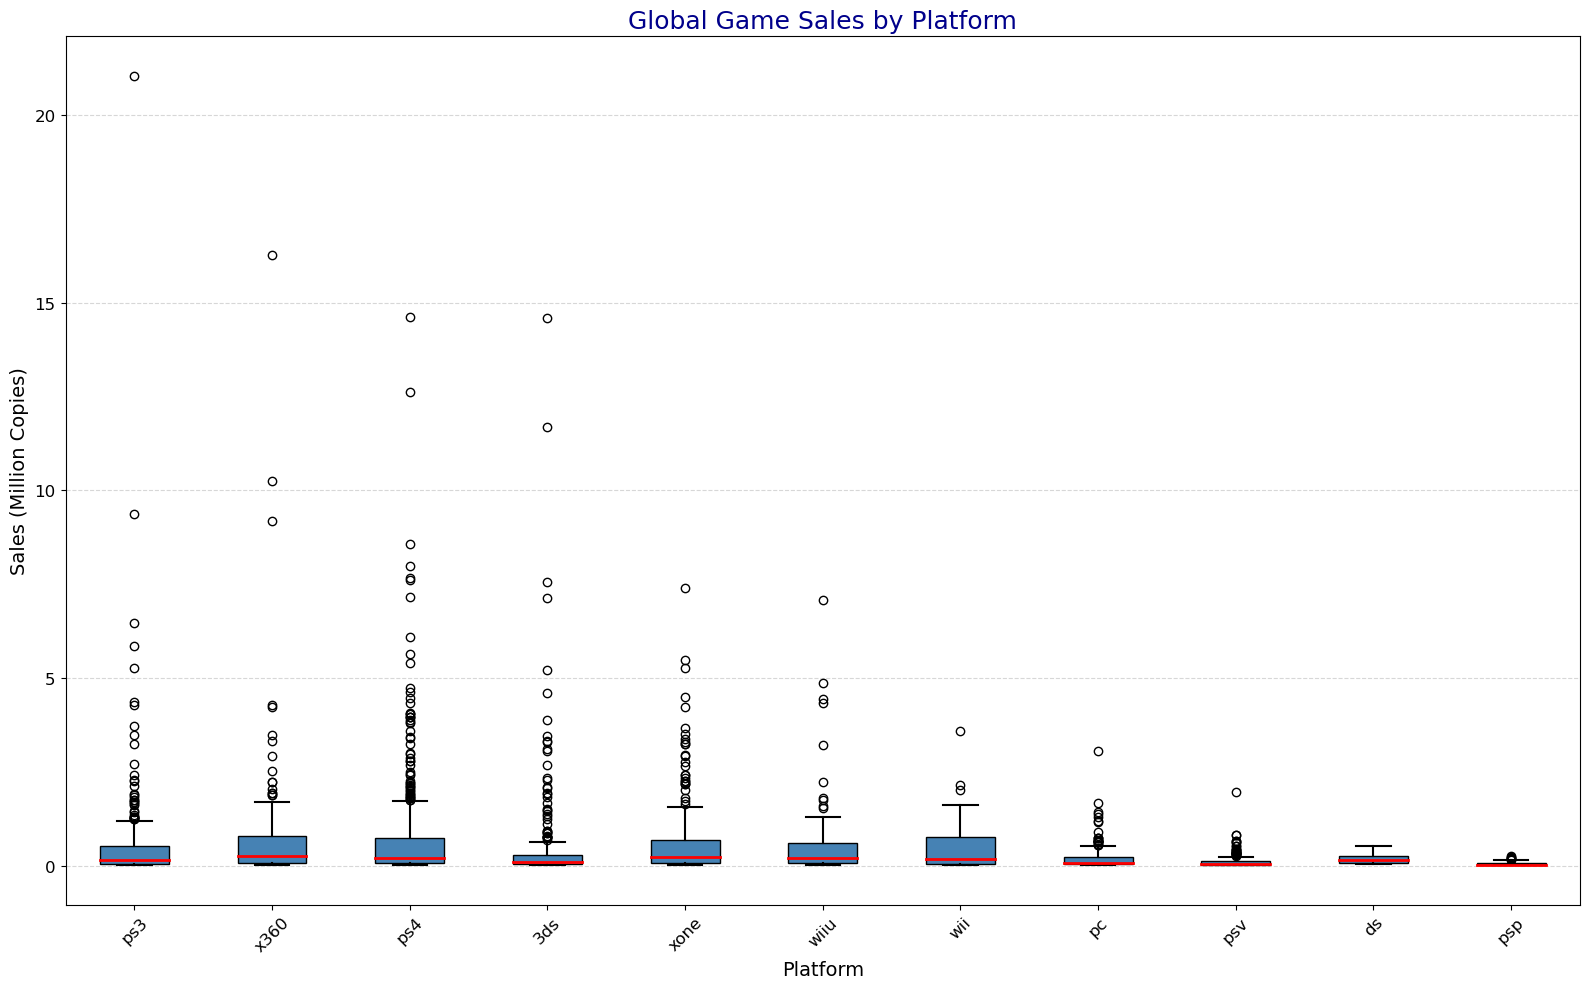

In [35]:
plt.figure(figsize=(16, 10))

# Create boxplot data grouped by platform
platforms = data_actual['platform'].unique()
sales_data = [data_actual[data_actual['platform'] == platform]['total_sales'] for platform in platforms]

# Plot the boxplot
plt.boxplot(
    sales_data,
    labels=platforms,
    patch_artist=True,  # Fill the boxes with color
    boxprops=dict(facecolor='steelblue', color='black'),  # Box styling
    medianprops=dict(color='red', linewidth=2),  # Median line styling
    whiskerprops=dict(color='black', linewidth=1.5),  # Whisker styling
    capprops=dict(color='black', linewidth=1.5)  # Cap styling
)

# Enhanced title and labels
plt.title('Global Game Sales by Platform', fontsize=18, color='DarkBlue')
plt.ylabel('Sales (Million Copies)', fontsize=14)
plt.xlabel('Platform', fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Display the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

Unfortunately, in this boxplot, only the outliers are visible, and the median and the 75th percentile are not visible at all. For more substantiated conclusions, it would be worth adding a second view with a different y-axis scale that displays only the lower part of the boxplots.

Both views are important because:
- **Outliers** represent the "stars" that bring in the maximum revenue.
- The second view provides insights into the overall distribution of sales.

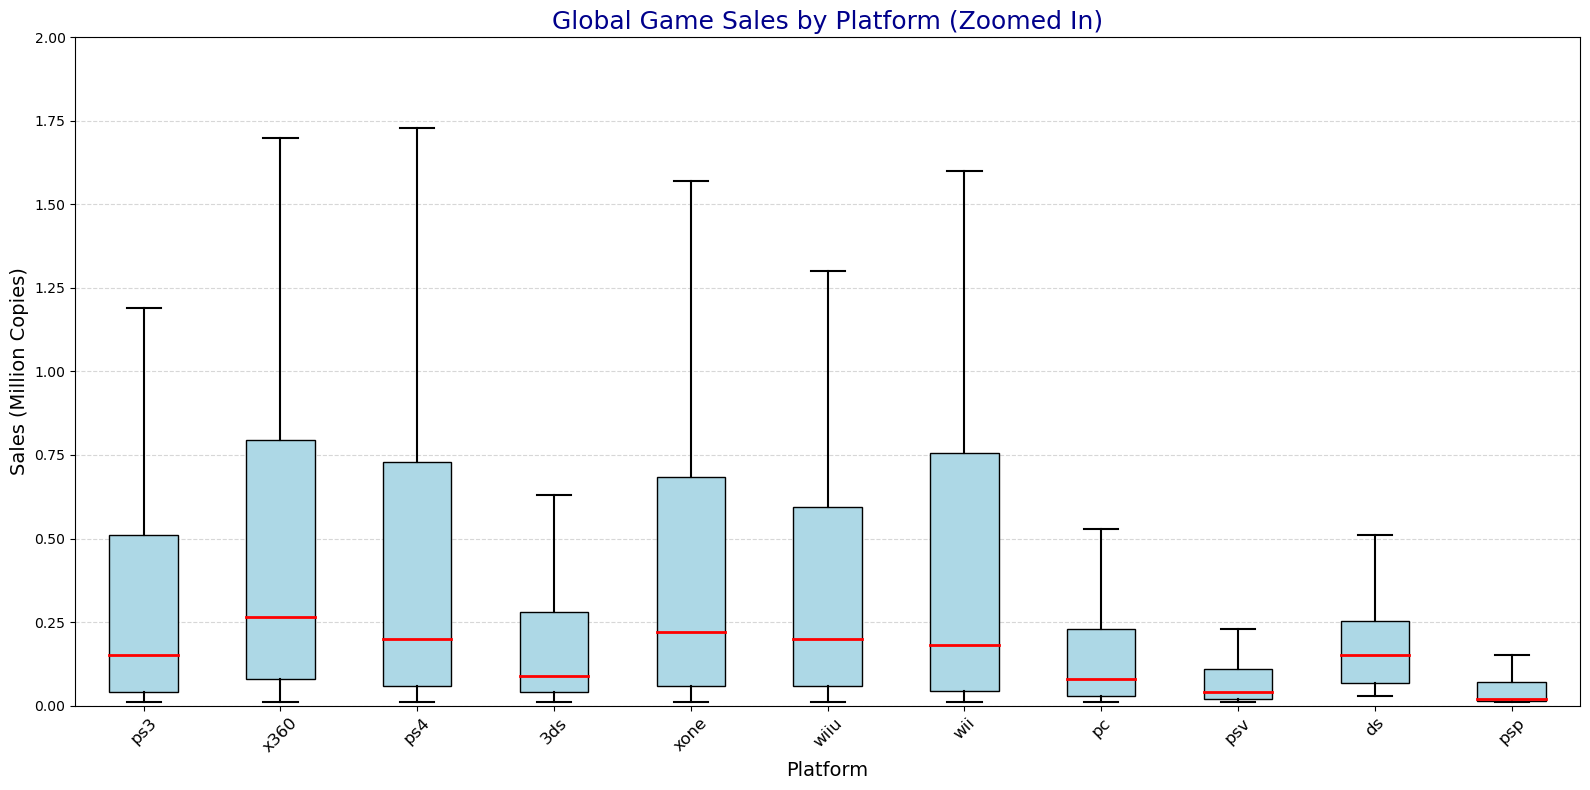

In [36]:
plt.figure(figsize=(16, 8))
plt.boxplot(
    [data_actual[data_actual['platform'] == platform]['total_sales']
     for platform in data_actual['platform'].unique()],
    labels=data_actual['platform'].unique(),
    showfliers=False,  # Hide outliers for zoomed-in view
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5)
)
plt.title('Global Game Sales by Platform (Zoomed In)', fontsize=18, color='DarkBlue')
plt.ylabel('Sales (Million Copies)', fontsize=14)
plt.xlabel('Platform', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.ylim(0, 2)  # Adjust y-axis for zoomed-in view
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

1. **Outliers**:
   - The number of outliers represents the games that generated the highest revenue.
   - These can be used to compare platforms or genres based on the number of record-breaking games they have produced.
   - This provides insight into which platforms or genres are capable of releasing the most appealing and successful games for players.

2. **Zoomed-In View (Median and Quartiles)**:
   - The second view focuses on comparing **median sales** across platforms or genres.
   - This helps to understand the typical sales volume of games for each platform/genre.
   - It highlights which platform or genre demonstrates more consistent and stable sales performance over time.

Together, these views allow for a comprehensive analysis:
- Outliers showcase the potential for exceptional performance.
- Median and quartile values provide an understanding of regular sales trends and stability.

**Observations from the Boxplots**

1. **Median Sales**:
   - Most platforms have median sales values close to the lower end of the range, indicating that typical game sales on these platforms are relatively low.

2. **Outliers**:
   - Platforms such as **PS3**, **X360**, **PS4**, and **3DS** show a significant number of outliers with relatively high sales.
   - This suggests the presence of several highly successful titles on these platforms, whose sales far exceed the average.

3. **Data Spread**:
   - The **PS4** shows a wide interquartile range, indicating a broader distribution of sales compared to other platforms.
   - The PS4 also has the highest number of outliers, which could indicate a large number of hit releases with high sales.

4. **Platforms with Low Sales**:
   - Platforms like **PSP** and **PSV** have very small interquartile ranges and low median sales, pointing to relatively weak game sales on these platforms.

5. **Platform Recency**:
   - **PS4** and **XOne** are relatively new platforms at the time of the data, which may explain their higher sales and larger number of outliers compared to older platforms such as **PS3** and **X360**.


### 3.5 Analyzing the Impact of User and Critic Reviews on Sales for a Popular Platform

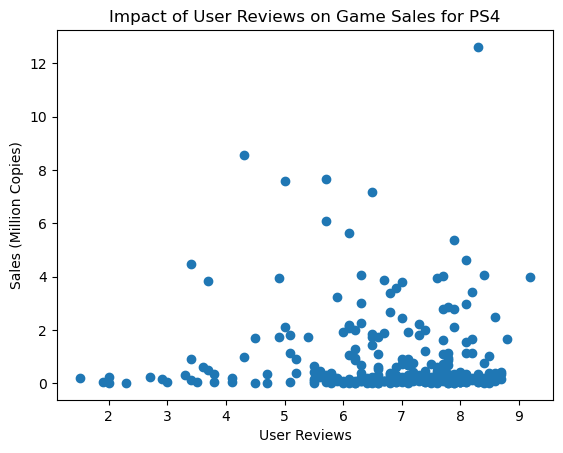

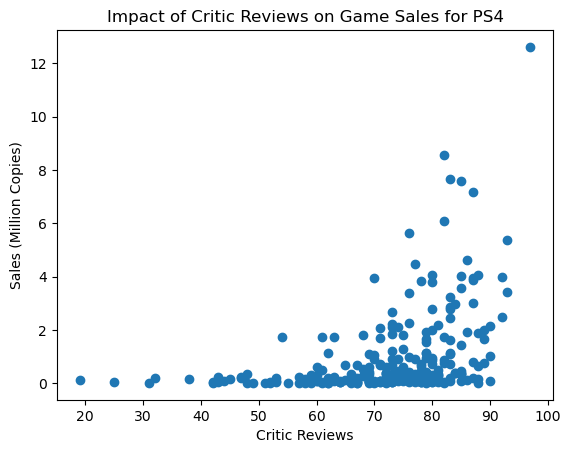

Correlation between user reviews and sales: -0.032
Correlation between critic reviews and sales: 0.407


In [37]:
# Select data for a specific platform, for example, PS4
ps4_data = data_actual[data_actual['platform'] == 'ps4']

# Create a scatter plot between user reviews and sales
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.title('Impact of User Reviews on Game Sales for PS4')
plt.xlabel('User Reviews')
plt.ylabel('Sales (Million Copies)')
plt.show()

# Create a scatter plot between critic reviews and sales
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.title('Impact of Critic Reviews on Game Sales for PS4')
plt.xlabel('Critic Reviews')
plt.ylabel('Sales (Million Copies)')
plt.show()

# Calculate correlation between user reviews and sales
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f'Correlation between user reviews and sales: {round(user_corr, 3)}')

# Calculate correlation between critic reviews and sales
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print(f'Correlation between critic reviews and sales: {round(critic_corr, 3)}')

**Discussion of Correlation**

1. **Correlation Between User Reviews and Sales**:
   - The correlation coefficient between user reviews and game sales for PS4 is very close to zero (-0.032), indicating no significant linear relationship between these two variables.
   - This suggests that user reviews do not have a strong impact on game sales for this platform.

2. **Correlation Between Critic Reviews and Sales**:
   - The correlation coefficient between critic reviews and game sales is positive, at 0.407.
   - This indicates a moderate positive linear relationship, meaning that games with higher critic scores tend to have higher sales.
   - However, while critic reviews may influence sales, they are not the sole determinant of a game's sales performance.


**Discussion on the Impact of Reviews and Outliers**

1. **Impact of Reviews on Sales**:
   - The scatter plots show that most games have sales below 2 million copies, regardless of their ratings.
   - However, games with higher critic scores tend to achieve higher maximum sales levels, suggesting that critic reviews may have some influence on peak performance.

2. **Outliers**:
   - There are individual games with exceptionally high sales that do not correlate with either user or critic reviews.
   - These outliers likely represent highly popular games that achieve success due to factors other than critical acclaim or user ratings, such as brand recognition, marketing, or franchise strength.

**Conclusion:**
- Critic reviews appear to have a greater impact on game sales than user reviews.
- Despite the positive relationship between critic reviews and sales, it is not strong enough to be the sole determinant of a game's success.
- Other factors, such as brand popularity, marketing efforts, and franchise history, may play a significant role in determining sales performance.


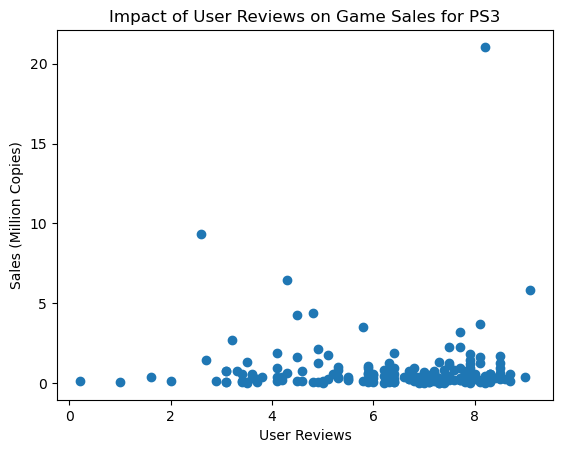

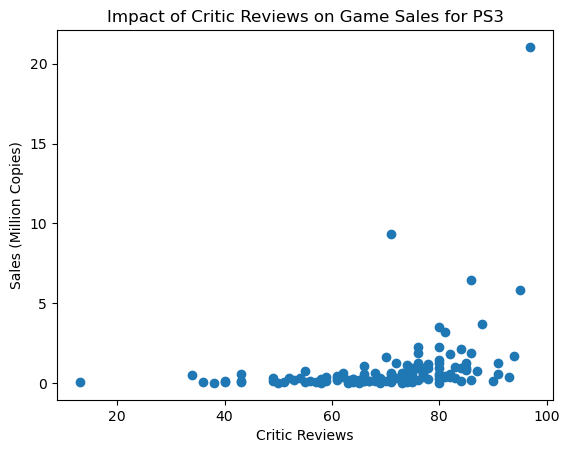

Correlation between user reviews and sales: 0.002
Correlation between critic reviews and sales: 0.334


In [38]:
# Select data for a specific platform, for example, PS3
ps3_data = data_actual[data_actual['platform'] == 'ps3']

# Create a scatter plot between user reviews and sales
plt.scatter(ps3_data['user_score'], ps3_data['total_sales'])
plt.title('Impact of User Reviews on Game Sales for PS3')
plt.xlabel('User Reviews')
plt.ylabel('Sales (Million Copies)')
plt.show()

# Create a scatter plot between critic reviews and sales
plt.scatter(ps3_data['critic_score'], ps3_data['total_sales'])
plt.title('Impact of Critic Reviews on Game Sales for PS3')
plt.xlabel('Critic Reviews')
plt.ylabel('Sales (Million Copies)')
plt.show()

# Calculate correlation between user reviews and sales
user_corr = ps3_data['user_score'].corr(ps3_data['total_sales'])
print(f'Correlation between user reviews and sales: {round(user_corr, 3)}')

# Calculate correlation between critic reviews and sales
critic_corr = ps3_data['critic_score'].corr(ps3_data['total_sales'])
print(f'Correlation between critic reviews and sales: {round(critic_corr, 3)}')

**Correlation Between User Reviews and Sales:**
- The correlation coefficient is extremely small (0.002), indicating no significant linear relationship between user reviews and game sales on the PS3 platform.
- This suggests that user opinions have little to no impact on the overall sales of games for this platform.

**Correlation Between Critic Reviews and Sales:**
- The correlation coefficient is 0.334, indicating a weak positive linear relationship between critic reviews and game sales.
- While the relationship is not strong, it implies that higher critic scores may have a modest positive effect on game sales.

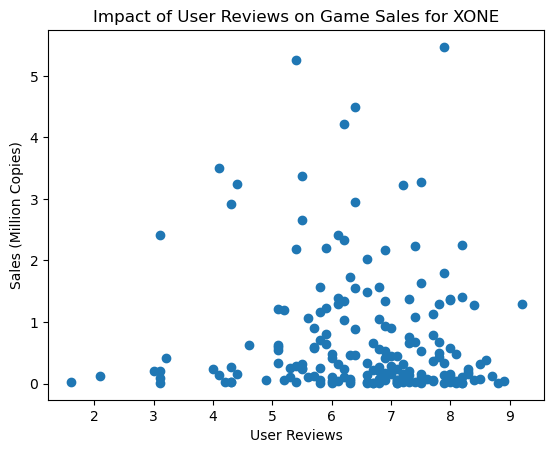

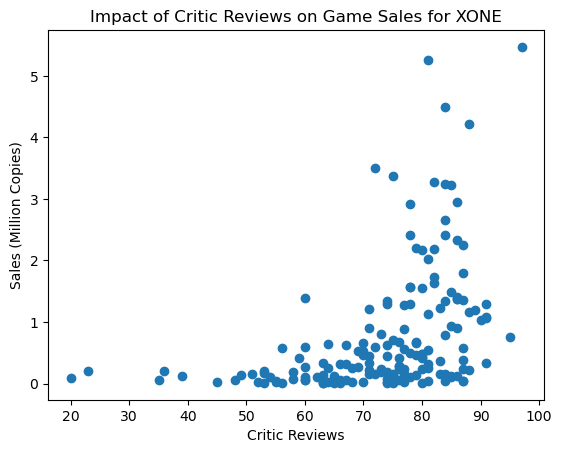

Correlation between user reviews and sales: -0.069
Correlation between critic reviews and sales: 0.417


In [39]:
# Select data for a specific platform, for example, XONE
xone_data = data_actual[data_actual['platform'] == 'xone']

# Create a scatter plot between user reviews and sales
plt.scatter(xone_data['user_score'], xone_data['total_sales'])
plt.title('Impact of User Reviews on Game Sales for XONE')
plt.xlabel('User Reviews')
plt.ylabel('Sales (Million Copies)')
plt.show()

# Create a scatter plot between critic reviews and sales
plt.scatter(xone_data['critic_score'], xone_data['total_sales'])
plt.title('Impact of Critic Reviews on Game Sales for XONE')
plt.xlabel('Critic Reviews')
plt.ylabel('Sales (Million Copies)')
plt.show()

# Calculate correlation between user reviews and sales
user_corr = xone_data['user_score'].corr(xone_data['total_sales'])
print(f'Correlation between user reviews and sales: {round(user_corr, 3)}')

# Calculate correlation between critic reviews and sales
critic_corr = xone_data['critic_score'].corr(xone_data['total_sales'])
print(f'Correlation between critic reviews and sales: {round(critic_corr, 3)}')

**Correlation Between User Reviews and Sales:**
- The correlation coefficient is -0.069, indicating a very weak negative relationship between user reviews and game sales.
- Practically, this suggests that user reviews have almost no influence on the sales volume of games for the Xbox One platform.

**Correlation Between Critic Reviews and Sales:**
- The correlation coefficient is 0.417, indicating a moderate positive relationship between critic reviews and game sales.
- Higher critic scores may contribute to increased sales, but the degree of influence is not decisive.


#### Summary of User and Critic Reviews on Game Sales

**Impact of User Reviews on Sales:**
- For all three platforms, the correlation coefficients between user reviews and game sales are very weak.
- This indicates that user opinions have no noticeable impact on game sales for the analyzed platforms.

**Impact of Critic Reviews on Sales:**
- The correlation between critic scores and game sales is positive and moderate for PS4 and Xbox One. This suggests some connection between high critic ratings and increased sales.
- For PS3, the correlation is slightly weaker but still positive, indicating that critic reviews have some influence on game sales, though not a decisive factor.

**General Trend:**
- On all three platforms, critic reviews carry more weight regarding sales compared to user reviews.
- However, it is essential to note that while critic reviews have a significant influence, they are not the sole factor determining a game's commercial success.
- Other factors, such as game genre, marketing campaigns, and brand recognition, also play critical roles in driving sales.


It is possible that users are more critical of games than professional critics. However, within the scope of this project (given the limitations of the data), we cannot evaluate which specific actions or elements contributed to sales growth.


### 3.6 Analyzing the Overall Distribution of Games by Genre

In [ ]:
# Calculate total sales by genre and sort in descending order
genre_sales = data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot total sales by genre
plt.figure(figsize=(12, 8))
genre_sales.plot(kind='barh')
plt.title('Total Sales by Genre')
plt.xlabel('Sales (Million Copies)')
plt.ylabel('Genre')
plt.xticks()
plt.show()

**Most Profitable Genres:**
- The "Action" genre holds the leading position in terms of sales, followed by "Shooter."
- This indicates that games in these genres are highly popular and generate significant revenue.

**Genres with Moderate Sales:**
- "Sports" and "Role-Playing" genres show moderate sales, suggesting a stable popularity among specific groups of players.

**Genres with Low Sales:**
- Genres such as "Platform," "Racing," "Fighting," "Adventure," "Simulation," "Strategy," and "Puzzle" demonstrate relatively low sales compared to the leaders.
- This could be due to a smaller audience or the nature of these genres, which might not often become blockbusters or mainstream hits.

**Conclusions:**
- Genres with high sales levels are typically associated with dynamic and engaging gameplay, making them popular among a broad audience.
- Genres with lower sales may be more niche. While they might not have widespread appeal, they can attract a smaller, loyal audience.
- For developers and publishers, these insights can guide decisions regarding new game development and resource allocation.


In [ ]:
# Create a boxplot for global game sales by genre
plt.figure(figsize=(12, 8))
plt.boxplot([data_actual[data_actual['genre'] == genre]['total_sales']
             for genre in data_actual['genre'].unique()],
             labels=data_actual['genre'].unique())
plt.title('Global Game Sales by Genre')
plt.ylabel('Sales (Million Copies)')
plt.xlabel('Genre')
plt.show()

- Shooter, Sports, and Action dominate in terms of the number of outliers, indicating their ability to produce highly successful games with exceptionally high sales.
- Platform has fewer outliers but still demonstrates the potential for notable successes.

In [ ]:
# Create a boxplot for global game sales by genre (without outliers)
plt.figure(figsize=(12, 8))
plt.boxplot([data_actual[data_actual['genre'] == genre]['total_sales']
             for genre in data_actual['genre'].unique()],
             labels=data_actual['genre'].unique(), showfliers=False)
plt.title('Global Game Sales by Genre')
plt.ylabel('Sales (Million Copies)')
plt.xlabel('Genre')
plt.show()

- **Shooter** and **Sports** are the most profitable genres, with Shooter clearly taking the lead in terms of median sales and variability.
- **Platform** has higher-than-moderate median sales and represents a strong contender for profitability.
- **Action** and **Role-Playin**g have moderate median sales, but their variability suggests different levels of risk and reward.
- Lower-performing genres are stable but cater to smaller, niche markets.

**InterQuartile Range**
- Shooter has the widest IQR, reflecting the greatest variability in sales. It includes both highly successful and modestly performing games.
- Sports, Platform, and Action follow in terms of IQR, showing diverse sales performance.
- Genres with narrow IQRs, such as Strategy and Puzzle, demonstrate stable but consistently low sales.

**Summary**
- **Shooter and Sports** are the most profitable and high-potential genres, consistently producing successful titles with strong sales performance and outliers.
- **Platform** is a strong contender, with high median sales and a moderate number of hits.
- **Action** and **Role-Playing** show moderate performance but with different levels of variability and stability.
- Lower-performing genres, like Puzzle and Strategy, cater to smaller, niche markets with stable but modest sales.

### 3.7 Creating a User Profile for Each Region

#### 3.7.1 Identify the Top 5 Platforms for Each Region

In [ ]:
# Determine the Top 5 Platforms for Each Region
top_platforms_na = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Add an "Others" category for the remaining sales in each region
others_na = data_actual['na_sales'].sum() - top_platforms_na.sum()
others_eu = data_actual['eu_sales'].sum() - top_platforms_eu.sum()
others_jp = data_actual['jp_sales'].sum() - top_platforms_jp.sum()

na_data_actual = pd.concat([top_platforms_na, pd.Series({'others': others_na})])
eu_data_actual = pd.concat([top_platforms_eu, pd.Series({'others': others_eu})])
jp_data_actual = pd.concat([top_platforms_jp, pd.Series({'others': others_jp})])

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8), facecolor='white')

plt.suptitle('Most Popular Platforms by Region', fontsize=24, fontweight='bold')

# North America
axs[0].pie(na_data_actual, labels=na_data_actual.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[0].set_title('Top 5 Platforms in North America', fontsize=18, fontweight='bold')

# Europe
axs[1].pie(eu_data_actual, labels=eu_data_actual.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[1].set_title('Top 5 Platforms in Europe', fontsize=18, fontweight='bold')

# Japan
axs[2].pie(jp_data_actual, labels=jp_data_actual.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[2].set_title('Top 5 Platforms in Japan', fontsize=18, fontweight='bold')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


**North America:**
- **PS4** (24.8%) and **Xbox One** (21.3%) dominate, followed by **X360** (18.7%) and **PS3** (14.5%).
- **Others** make up 12.0%.

**Europe:**
- **PS4** leads significantly (36.0%), with **PS3** (17.3%) and **XONE** (13.2%) trailing.
- **Others** have a higher share (14.9%) compared to North America.

**Japan:**
- **3DS** dominates (48.2%), with **PS3** (16.6%) and **PSV** (11.2%) following.
- **Others** accounts only for 3%.

**Summary:**
- **PS4** dominates in North America and Europe but is outperformed by **3DS**, **PS3** and **PSV** in Japan.
- **Xbox One** has strong presence in the West but is almost absent in Japan.
- **3DS** shines in Japan, with weaker performance elsewhere.
- The **Others** category is more significant in Europe and USA, reflecting platform diversity.

#### 3.7.2 Identify Top 5 Genres for Each Region

In [ ]:
# Identify top 5 genres for each region
top_genres_na = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Add "Others" category for remaining sales in each region
others_na = data_actual['na_sales'].sum() - top_genres_na.sum()
others_eu = data_actual['eu_sales'].sum() - top_genres_eu.sum()
others_jp = data_actual['jp_sales'].sum() - top_genres_jp.sum()

# Create new DataFrames for visualization
na_genre_actual = pd.concat([top_genres_na, pd.Series({'Others': others_na})])
eu_genre_actual = pd.concat([top_genres_eu, pd.Series({'Others': others_eu})])
jp_genre_actual = pd.concat([top_genres_jp, pd.Series({'Others': others_jp})])

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8), facecolor='white')

plt.suptitle('Most Popular Genres by Region', fontsize=24, fontweight='bold')

# North America
axs[0].pie(na_genre_actual, labels=na_genre_actual.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[0].set_title('Top 5 Genres in North America', fontsize=18, fontweight='bold')

# Europe
axs[1].pie(eu_genre_actual, labels=eu_genre_actual.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[1].set_title('Top 5 Genres in Europe', fontsize=18, fontweight='bold')

# Japan
axs[2].pie(jp_genre_actual, labels=jp_genre_actual.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[2].set_title('Top 5 Genres in Japan', fontsize=18, fontweight='bold')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()


- **North America**: Action (28.8%) and Shooter (25.1%) dominate, followed by Sports (14.9%).
- **Europe**: Action (30.1%) leads, with Shooter (22.4%) and Sports (15.4%) trailing.
- **Japan**: Role-Playing (36.3%) is the clear favorite, with Action (28.8%) and Misc (6.5%) following.


#### 3.7.3 Determine the Impact of Ratings on Sales for Each Region

In [ ]:
esrb_sales_na = data_actual.groupby('rating')['na_sales'].sum()
esrb_sales_eu = data_actual.groupby('rating')['eu_sales'].sum()
esrb_sales_jp = data_actual.groupby('rating')['jp_sales'].sum()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8), facecolor='white')

plt.suptitle('Sales by ESRB Rating in Different Regions', fontsize=24, fontweight='bold')

# North America
axs[0].pie(esrb_sales_na, labels=esrb_sales_na.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[0].set_title('Sales by ESRB Rating in North America', fontsize=18, fontweight='bold')

# Europe
axs[1].pie(esrb_sales_eu, labels=esrb_sales_eu.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[1].set_title('Sales by ESRB Rating in Europe', fontsize=18, fontweight='bold')

# Japan
axs[2].pie(esrb_sales_jp, labels=esrb_sales_jp.index, autopct='%1.1f%%', startangle=90,
           colors=plt.cm.Paired.colors, textprops={'fontsize': 14})
axs[2].set_title('Sales by ESRB Rating in Japan', fontsize=18, fontweight='bold')

# Adjust layout and display
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

- **North America**: "M" rated games dominate with 37.7%, followed by "RP" (20.4%) and "E" (18.1%).
- **Europe**: "M" rated games also lead (37.0%), with "E" (21.3%) and "RP" (20.1%) trailing.
- **Japan**: "RP" games dominate significantly (60.4%), while "T" (14.6%) and "E" (10.8%) follow.

**Overall Summary**

Regional preferences for gaming platforms, genres, and ratings vary significantly:

- **North America and Europe**: PS4 dominates both markets, with Action and Shooter genres being the most popular, and "M" rated games leading sales.
- **Japan**: The 3DS is the top platform, with a strong preference for Role-Playing games, and "RP" (Rating Pending) games overwhelmingly dominate.


## 4. Statistical Analysis

### 4.1 Testing the Hypothesis of Equal Average User Ratings for Xbox One and PC

**H0**: The average user ratings for Xbox One and PC platforms are equal.

**H1**: The average user ratings for Xbox One and PC platforms are not equal.

A t-test for independent samples can be used, provided that the data is normally distributed or the sample size is large enough to apply the central limit theorem.

In [ ]:
# Filter user scores for Xbox One and PC
xbox_one_scores = data_actual[data_actual['platform'] == 'xone']['user_score'].dropna()
pc_scores = data_actual[data_actual['platform'] == 'pc']['user_score'].dropna()

# Perform D'Agostino's K-squared test for normality
xbox_normality = stats.normaltest(xbox_one_scores)
pc_normality = stats.normaltest(pc_scores)

# Results
xbox_normality, pc_normality

The p-value is smaller than the standard significance level (e.g., 0.05) for both variables. Both datasets do not follow a normal distribution. Therefore, we cannot use a parametric t-test. Instead, we should proceed with a non-parametric test, such as the Mann-Whitney U test

In [ ]:
# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(xbox_one_scores, pc_scores, alternative='two-sided')

# Define the significance level
alpha = 0.05

# Display results
print(f"Mann-Whitney U Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print(f"Since the p-value ({p_value:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis (H0).")
    print("Conclusion: The average user ratings for Xbox One and PC are significantly different.")
else:
    print(f"Since the p-value ({p_value:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis (H0).")
    print("Conclusion: The average user ratings for Xbox One and PC are not significantly different.")

Based on the presented information, it can be concluded that the Mann-Whitney U test did not reveal significant differences between the distributions (or medians) of user ratings for the Xbox One and PC platforms. The p-value of 0.5 exceeds the commonly used threshold of statistical significance (0.05), confirming the lack of evidence to reject the null hypothesis of equal distributions.

The obtained p-value indicates that, although the distributions (or medians) of the ratings are not identical, there is a 50% probability of observing such or greater differences purely by chance. This is clearly too high a probability to conclude that there is a significant difference between the user rating distributions (or medians) for the two platforms.

### 4.2 Testing the Hypothesis of Difference in Average User Ratings for Action and Sports Genres

**Null Hypothesis (H0):** The average user ratings for Action and Sports genres are equal.

**Alternative Hypothesis (H1):** The average user ratings for Action and Sports genres are different.

In [ ]:
# Filter user scores for Action and Sports genres
action_scores = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
sports_scores = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()

# Perform D'Agostino's K-squared test for normality
action_normality = stats.normaltest(action_scores)
sports_normality = stats.normaltest(sports_scores)

# Results
action_normality, sports_normality

Since the Action scores are **not normally distributed**, a **non-parametric test** such as the **Mann-Whitney U test** should be used to compare the two distributions.

In [ ]:
# Filter user scores for Action and Sports genres
action_scores = data_actual[data_actual['genre'] == 'Action']['user_score'].dropna()
sports_scores = data_actual[data_actual['genre'] == 'Sports']['user_score'].dropna()

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(action_scores, sports_scores, alternative='two-sided')

# Define the significance level
alpha = 0.05

# Display results
print(f"Mann-Whitney U Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print(f"Since the p-value ({p_value:.3f}) is less than the significance level ({alpha}), we reject the null hypothesis (H0).")
    print("Conclusion: The average user ratings for Action and Sports genres are significantly different.")
else:
    print(f"Since the p-value ({p_value:.3f}) is greater than the significance level ({alpha}), we fail to reject the null hypothesis (H0).")
    print("Conclusion: The average user ratings for Action and Sports genres are not significantly different.")

## 5. Summary

This project aimed to analyze video game sales data to uncover key insights about platform and genre preferences, the influence of ESRB ratings, and user rating trends. Below are the main findings:

**1. Platform Insights:**
- **PS4** dominates the North American and European markets, while **3DS** is the leader in Japan.
- **Xbox One** has strong sales in the West but is almost absent in Japan, where PlayStation and portable platforms like 3DS and PSV dominate.
- The **Others** category shows greater platform diversity in Europe and NA compared to Japan.

**2. Genre Insights:**
- **Action** and **Shooter** genres lead in sales in North America and Europe.
- **Role-Playing** is the dominant genre in Japan, reflecting regional cultural preferences.

**3. ESRB Ratings:**
- **Mature (M)** rated games dominate in North America and Europe.
- In Japan, **Rating Pending (RP)** games hold the largest share, likely reflecting differences in cultural and regulatory dynamics.

**4. User Ratings Analysis:**
- **Xbox One vs. PC**: No significant difference in average user ratings between these platforms.
- **Action vs. Sports**: Significant differences exist in user ratings, with the Mann-Whitney U test confirming that the two genres are rated differently.

**Final Recommendations:**
- Focus on **PS4** and **3DS** for global strategies, while tailoring regional offerings based on local preferences (e.g., Role-Playing games for Japan).
- Invest in popular genres like **Action**, **Shooter**, and **Role-Playing**, which consistently attract high sales and favorable ratings.
- Leverage user rating data for genres to refine marketing strategies, highlighting strengths of genres with higher average ratings.
- Continue exploring ESRB rating trends to align content with regional preferences and regulatory standards.

This comprehensive analysis provides actionable insights for targeting markets, optimizing product offerings, and planning marketing campaigns in the highly dynamic video game industry.